In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('Офіційний курс гривні щодо іноземних валют.xlsx')
data.head(10)

,Дата,Час,Код цифровий,Код літерний,Кількість одиниць,Назва валюти,"Офіційний курс гривні, грн"
0,01.01.2024,0.0,978,EUR,1,Євро,41.9960
1,02.01.2024,0.0,978,EUR,1,Євро,42.0059
2,03.01.2024,0.0,978,EUR,1,Євро,41.7209
3,04.01.2024,0.0,978,EUR,1,Євро,41.6073
4,05.01.2024,0.0,978,EUR,1,Євро,41.6665
5,06.01.2024,0.0,978,EUR,1,Євро,41.6665
6,07.01.2024,0.0,978,EUR,1,Євро,41.6665
7,08.01.2024,0.0,978,EUR,1,Євро,41.5730
8,09.01.2024,0.0,978,EUR,1,Євро,41.7973
9,10.01.2024,0.0,978,EUR,1,Євро,41.8185


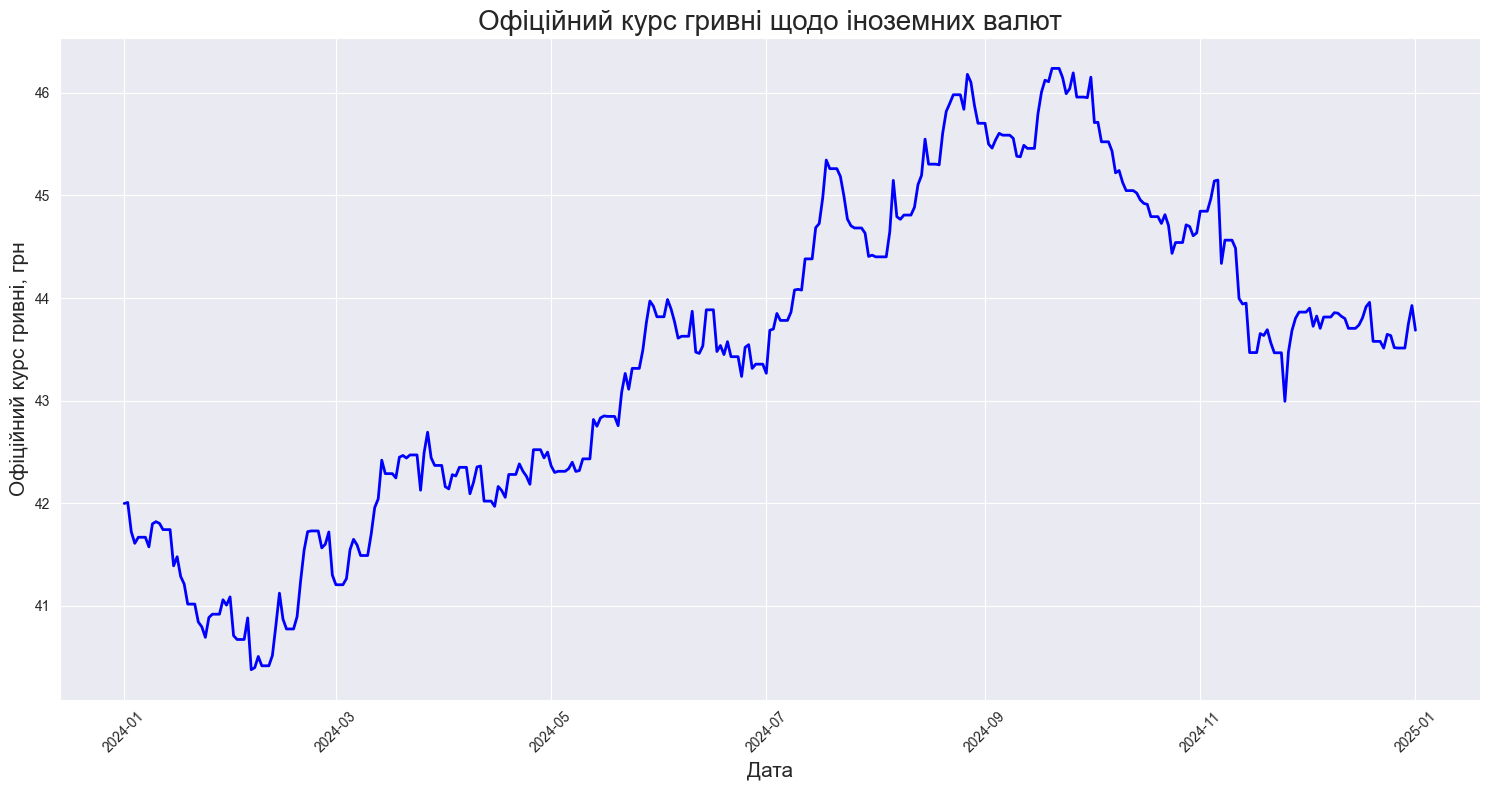

In [4]:
mask = pd.to_datetime(data['Дата'], format='%d.%m.%Y') >= pd.to_datetime('01.01.2024', format='%d.%m.%Y')
data_filtered = data[mask]
data_filtered = data_filtered.drop_duplicates(subset='Дата', keep='first')

date = data_filtered['Дата'].to_numpy()
value = data_filtered['Офіційний курс гривні, грн'].to_numpy()
date = pd.to_datetime(date, format='%d.%m.%Y')


plt.figure(figsize=(15, 8))
plt.plot(date, value, color='blue', linewidth=2)
plt.title('Офіційний курс гривні щодо іноземних валют', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Офіційний курс гривні, грн', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Лінійний тренд: y = 40.80 + 0.01 * x


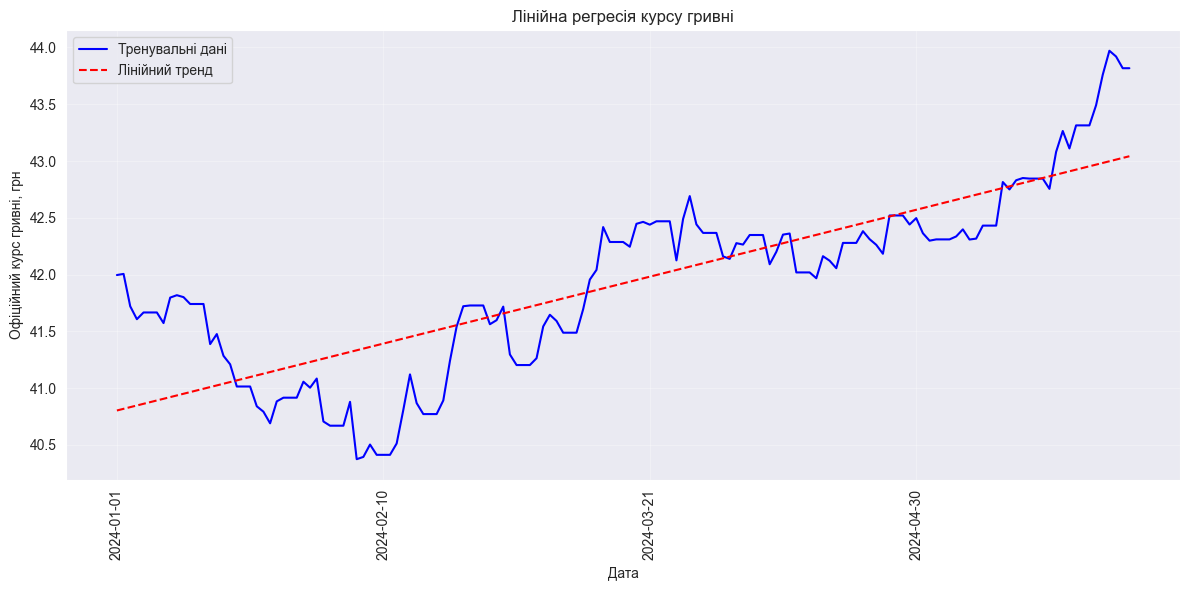

In [5]:
train_len = 153
train = data_filtered.iloc[:train_len].copy()

# Обробка дат і значень
train['Дата'] = pd.to_datetime(train['Дата'], format='%d.%m.%Y')
train['Офіційний курс гривні, грн'] = train['Офіційний курс гривні, грн'].astype(float)
train_data = train['Офіційний курс гривні, грн'].values
dates = train['Дата']

# Функція для побудови лінійного тренду
def linear_trend(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    a = y_mean - b * x_mean
    return a, b

# Розрахунок параметрів тренду
x_vals = np.arange(len(train_data))
a, b = linear_trend(x_vals, train_data)
trend_line = a + b * x_vals

print(f"Лінійний тренд: y = {a:.2f} + {b:.2f} * x")

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(dates, train_data, label='Тренувальні дані', color='blue')
plt.plot(dates, trend_line, label='Лінійний тренд', color='red', linestyle='--')
plt.title('Лінійна регресія курсу гривні')
plt.xlabel('Дата')
plt.ylabel('Офіційний курс гривні, грн')
plt.xticks(dates[::40], rotation=90)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


X matrix: [[1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00]
 [1.0000e+00 3.0000e+00 9.0000e+00]
 [1.0000e+00 4.0000e+00 1.6000e+01]
 [1.0000e+00 5.0000e+00 2.5000e+01]
 [1.0000e+00 6.0000e+00 3.6000e+01]
 [1.0000e+00 7.0000e+00 4.9000e+01]
 [1.0000e+00 8.0000e+00 6.4000e+01]
 [1.0000e+00 9.0000e+00 8.1000e+01]
 [1.0000e+00 1.0000e+01 1.0000e+02]
 [1.0000e+00 1.1000e+01 1.2100e+02]
 [1.0000e+00 1.2000e+01 1.4400e+02]
 [1.0000e+00 1.3000e+01 1.6900e+02]
 [1.0000e+00 1.4000e+01 1.9600e+02]
 [1.0000e+00 1.5000e+01 2.2500e+02]
 [1.0000e+00 1.6000e+01 2.5600e+02]
 [1.0000e+00 1.7000e+01 2.8900e+02]
 [1.0000e+00 1.8000e+01 3.2400e+02]
 [1.0000e+00 1.9000e+01 3.6100e+02]
 [1.0000e+00 2.0000e+01 4.0000e+02]
 [1.0000e+00 2.1000e+01 4.4100e+02]
 [1.0000e+00 2.2000e+01 4.8400e+02]
 [1.0000e+00 2.3000e+01 5.2900e+02]
 [1.0000e+00 2.4000e+01 5.7600e+02]
 [1.0000e+00 2.5000e+01 6.2500e+02]
 [1.0000e+00 2.6000e+01 6.7600e+02]
 [1.0000e+00 2.700

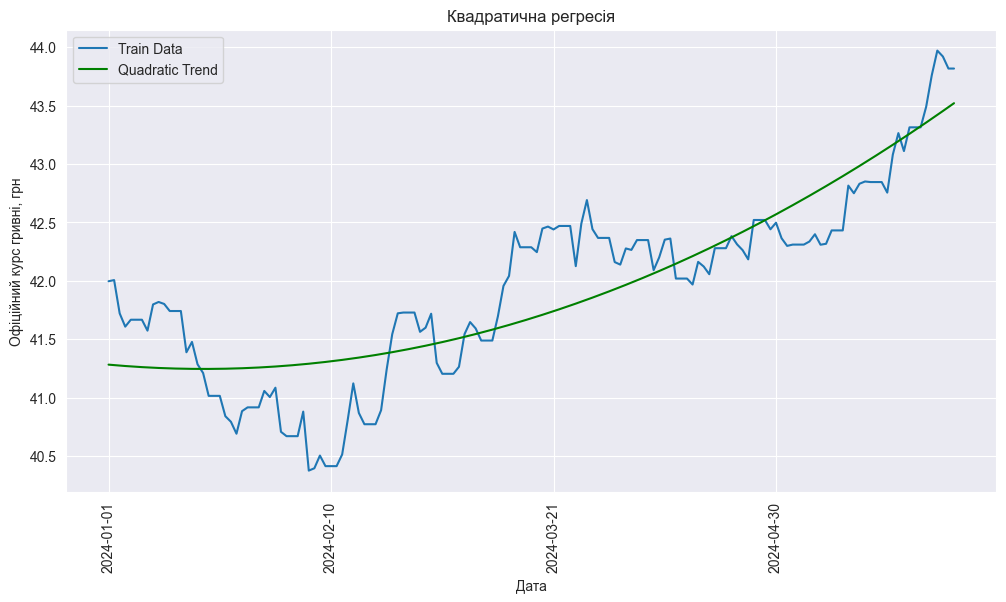

In [8]:
def gauss_elimination(A, b):
    n = len(b)
    aug = np.column_stack((A, b.reshape(-1, 1)))

    for i in range(n):
        max_row = i + np.argmax(abs(aug[i:, i]))
        if max_row != i:
            aug[[i, max_row]] = aug[[max_row, i]]

        if abs(aug[i, i]) < 1e-10:
            raise ValueError("Matrix is singular or nearly singular")

        for j in range(i + 1, n):
            factor = aug[j, i] / aug[i, i]
            aug[j, i:] -= factor * aug[i, i:]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = aug[i, -1]
        for j in range(i + 1, n):
            x[i] -= aug[i, j] * x[j]
        x[i] /= aug[i, i]

    print(x)
    return x

def quadratic_trend(x, y):
    n = len(x)
    X = np.column_stack((np.ones(n), x, x**2))
    print(f"X matrix: {X} \n")
    XTX = X.T @ X
    print(f"XTX matrix: {XTX} \n")
    XTy = X.T @ y
    print(f"XTy matrix: {XTy} \n")

    a, b, c  = gauss_elimination(XTX, XTy)
    print(a, b, c)
    return a, b, c

train_len = 153
train = data_filtered.iloc[:train_len].copy()
train['Дата'] = pd.to_datetime(train['Дата'], format='%d.%m.%Y')
train['Офіційний курс гривні, грн'] = train['Офіційний курс гривні, грн'].astype(float)

a, b, c = quadratic_trend(np.arange(len(train_data)), train_data)
print(f"Квадратична формула: y = {a:.2f} + {b:.2f} * x + {c:.2f} * x^2")

plt.figure(figsize=(12, 6))
plt.plot(train['Дата'], train_data, label='Train Data')
plt.plot(train['Дата'], a + b * np.arange(len(train_data)) + c * np.arange(len(train_data)) ** 2, label='Quadratic Trend', color='green')
plt.xlabel('Дата')
plt.ylabel('Офіційний курс гривні, грн')
plt.title('Квадратична регресія')
plt.xticks(train['Дата'][::40], rotation=90)
plt.legend()
plt.show()